# Análisis Exploratorio:
Describir la serie de tiempo y visualizarla.

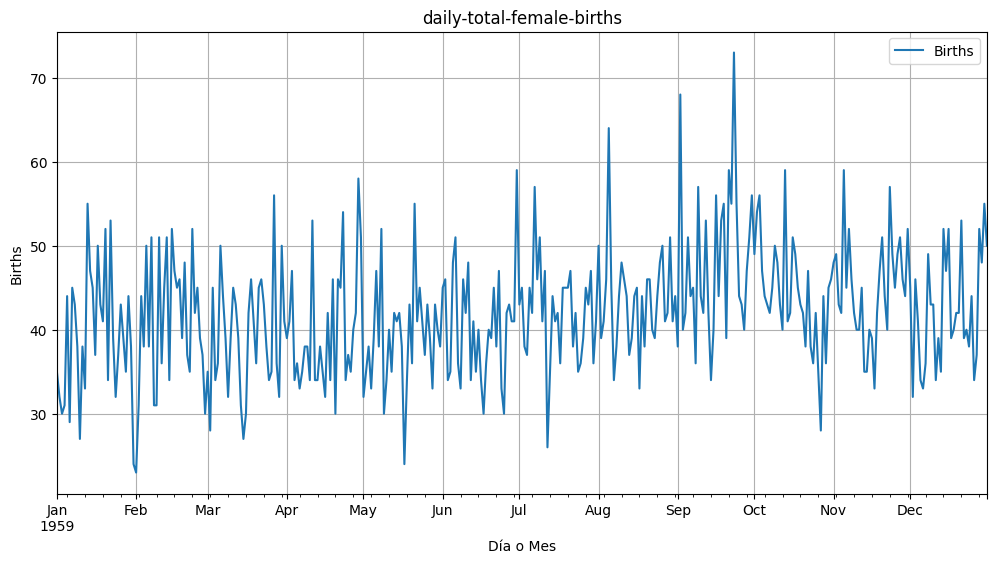

C:\Users\juanc\AppData\Local\Temp\ipykernel_13968\3841896736.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datos = pd.read_csv(archivo + ".csv", parse_dates=True, index_col=0)


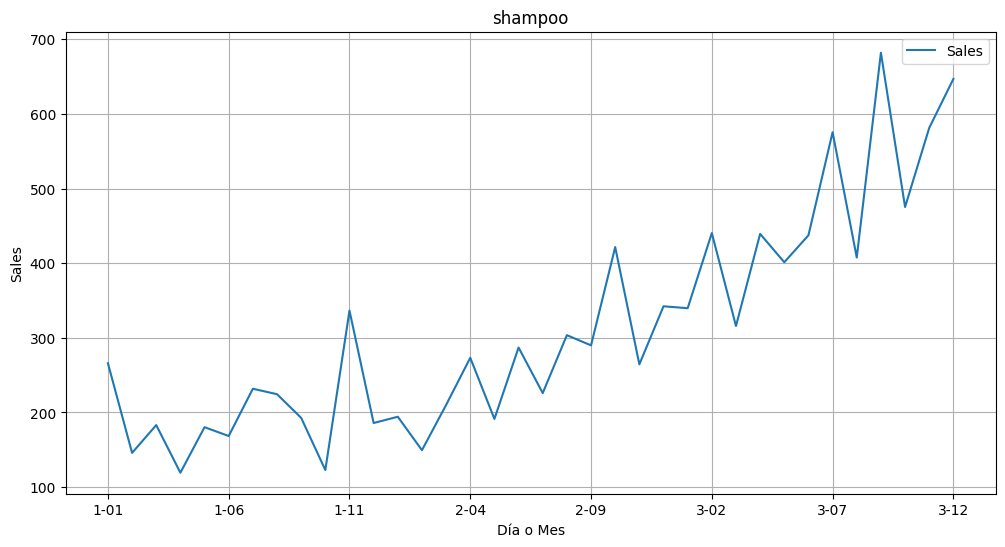

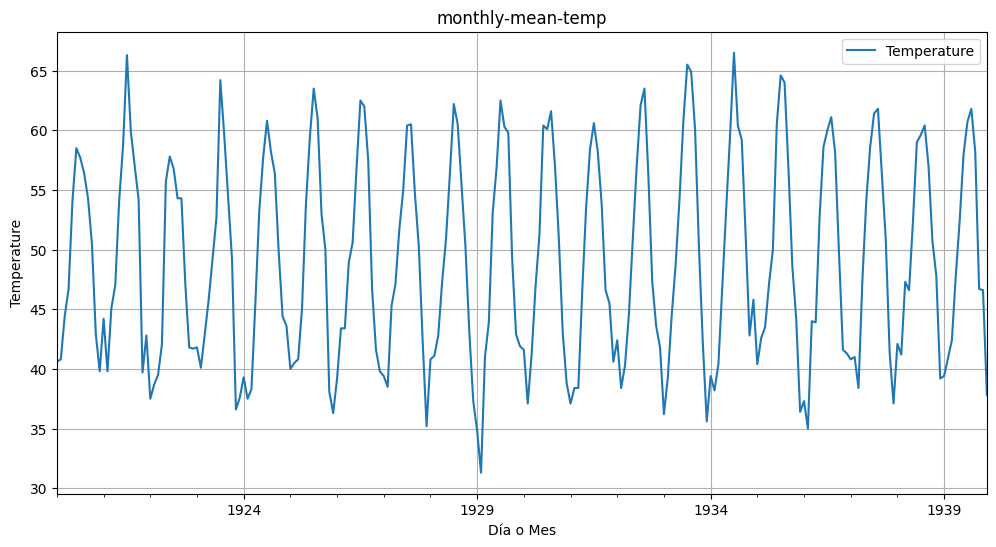

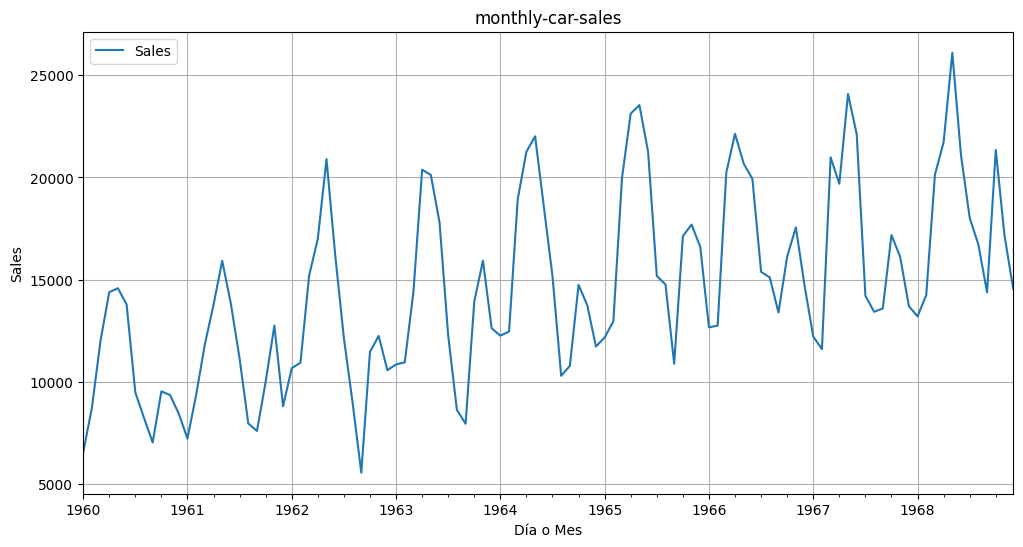

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

def mostrar_graficas(archivos):
    for archivo in archivos:
        # Leemos los datos
        datos = pd.read_csv(archivo + ".csv", parse_dates=True, index_col=0)
        
        # Hacemos el dibujo
        plt.figure(figsize=(12, 6))
        datos.plot(ax=plt.gca())  # gca es como decir "dame el eje actual para dibujar"
        plt.title(archivo)
        plt.ylabel(datos.columns[0])
        plt.xlabel("Día o Mes")
        plt.legend()
        plt.grid(True)
        plt.show()

# Aquí van los nombres de los archivos que vamos a graficar
nombres_archivos = [
    "daily-total-female-births",
    "shampoo",
    "monthly-mean-temp",
    "monthly-car-sales"
]

mostrar_graficas(nombres_archivos)

# Promedios:
• Aplicar métodos de promedios y comparar los resultados con el conjunto original.

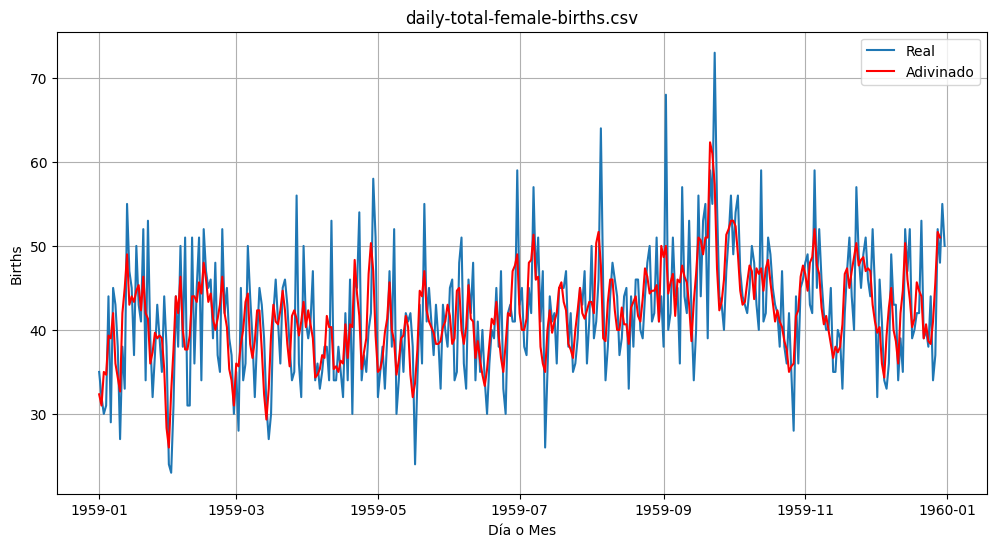

C:\Users\juanc\AppData\Local\Temp\ipykernel_13968\797383719.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datos = pd.read_csv(filename, parse_dates=True, index_col=0)


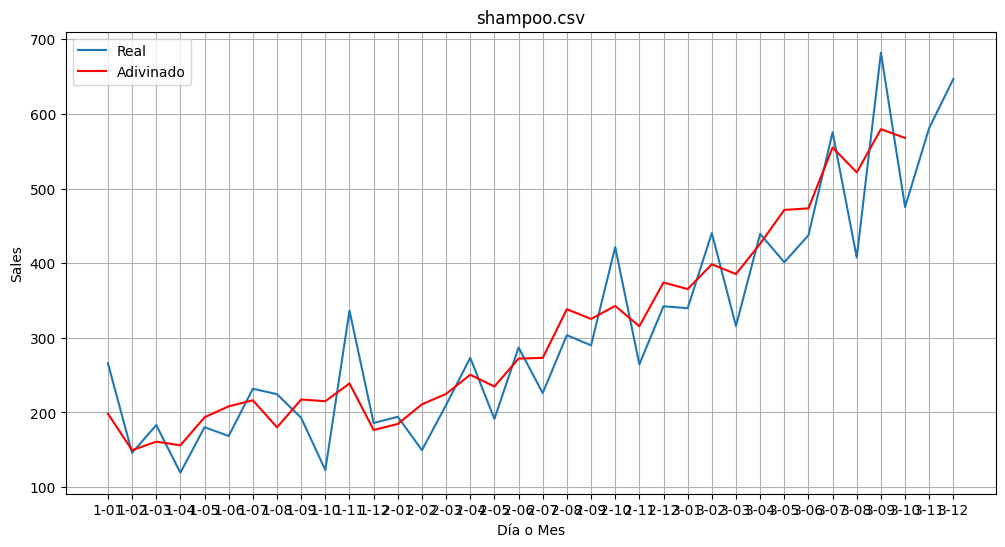

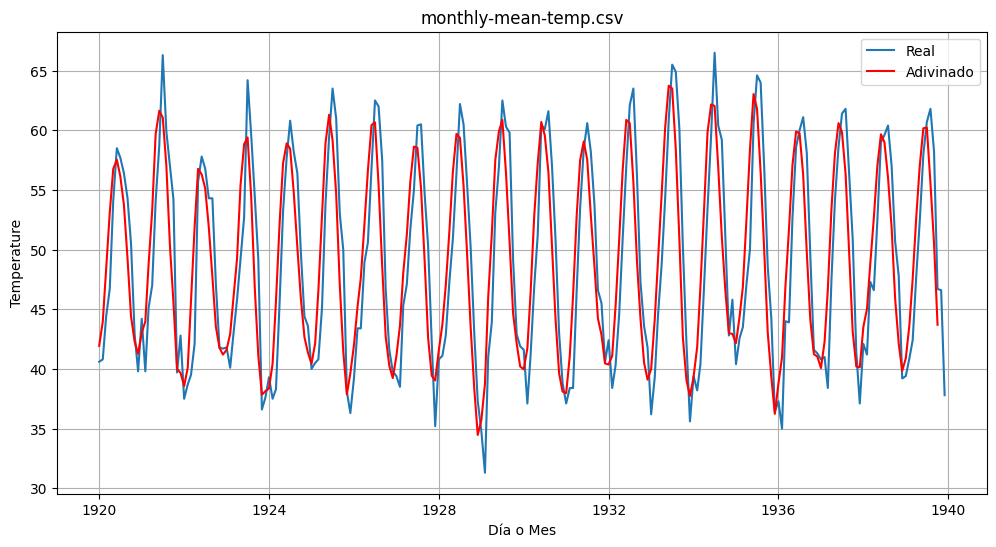

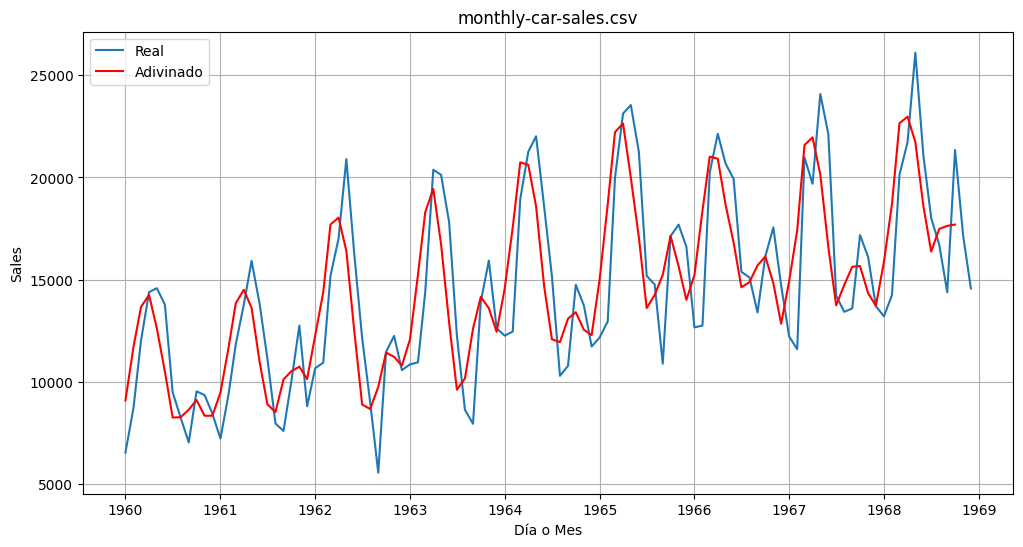

In [7]:
def graficar_con_promedio(filename, ventana=3):
    datos = pd.read_csv(filename, parse_dates=True, index_col=0)
    
    # Sacamos el promedio de los últimos datos y lo ponemos un poquito adelante para "adivinar" el siguiente dato
    datos['Adivinado'] = datos.rolling(ventana).mean().shift(-ventana+1)
    
    # Hacemos el dibujito
    plt.figure(figsize=(12, 6))
    plt.plot(datos.index, datos[datos.columns[0]], label='Real')
    plt.plot(datos.index, datos['Adivinado'], label='Adivinado', color='red')
    
    plt.title(filename)
    plt.ylabel(datos.columns[0])
    plt.xlabel("Día o Mes")
    plt.legend()
    plt.grid(True)
    plt.show()

# Estos son los datos con los que vamos a trabajar
archivos = [
    "daily-total-female-births.csv",
    "shampoo.csv",
    "monthly-mean-temp.csv",
    "monthly-car-sales.csv"
]

# Cuántos datos tomamos para el promedio
ventana = 3

for archivo in archivos:
    graficar_con_promedio(archivo, ventana)




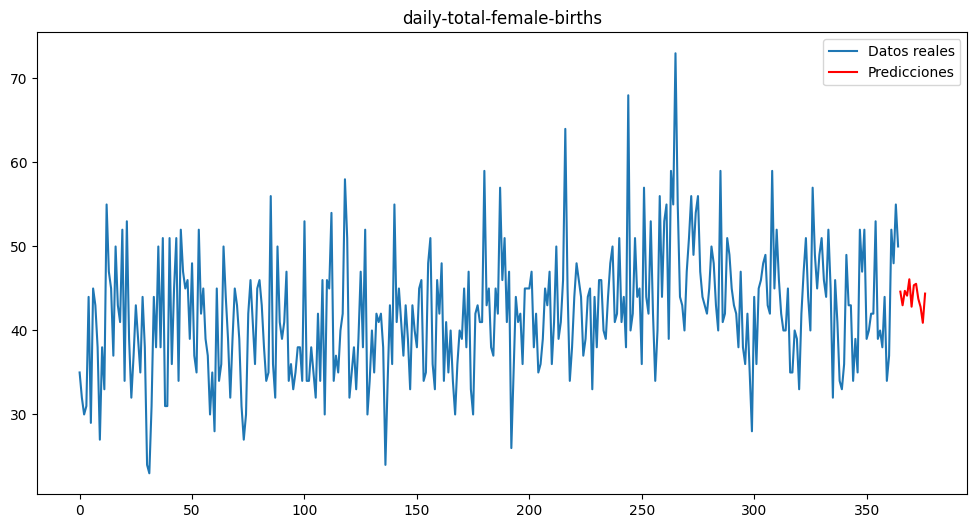

C:\Users\juanc\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\juanc\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


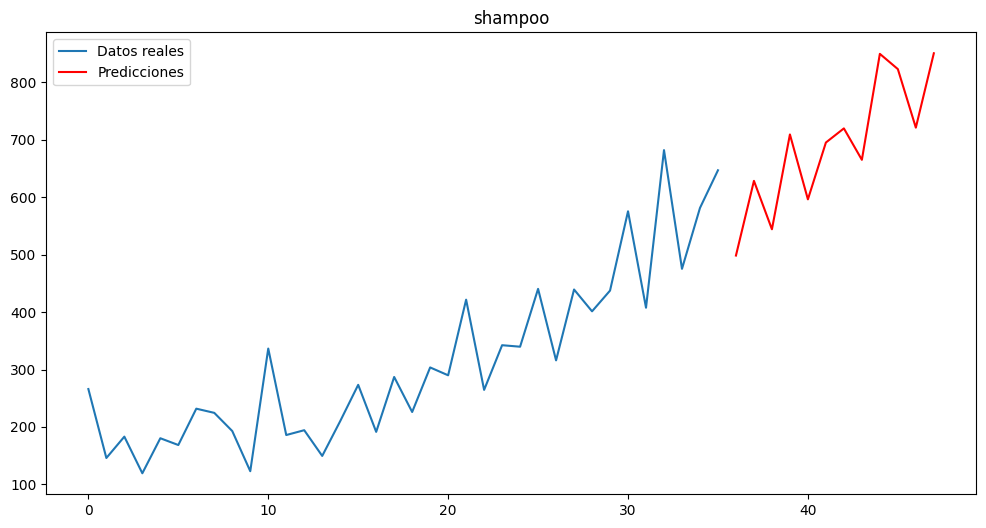

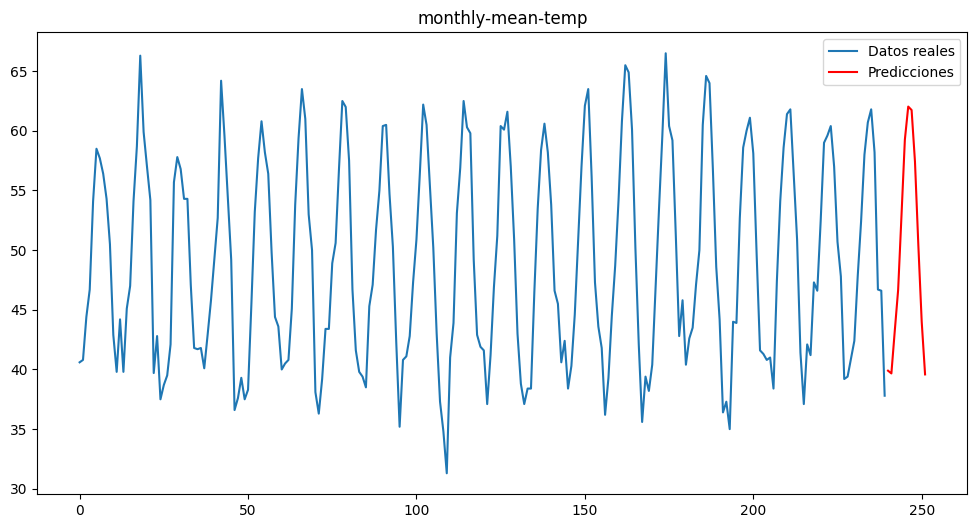

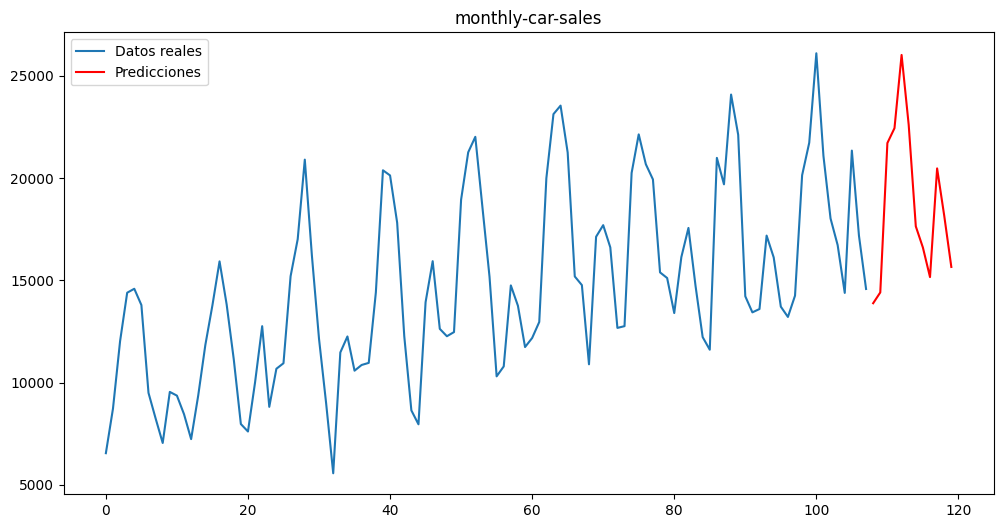

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

def predecir_con_sarima(nombre_archivo, numero_de_predicciones=12):
    # Leer el archivo
    datos = pd.read_csv(nombre_archivo + ".csv")
    
    # Tomar solo la columna de valores
    valores = datos[datos.columns[1]].values
    
    # Crear el modelo y entrenarlo
    modelo = SARIMAX(valores, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    modelo_listo = modelo.fit(disp=False)
    
    # Hacer las predicciones
    predicciones = modelo_listo.predict(len(valores), len(valores) + numero_de_predicciones - 1)
    
    # Mostrar los resultados
    plt.figure(figsize=(12, 6))
    plt.plot(valores, label='Datos reales')
    plt.plot(range(len(valores), len(valores) + numero_de_predicciones), predicciones, color='red', label='Predicciones')
    plt.title(nombre_archivo)
    plt.legend()
    plt.show()

# Archivos a analizar
archivos = [
    "daily-total-female-births",
    "shampoo",
    "monthly-mean-temp",
    "monthly-car-sales"
]

# Para cada archivo, hacer la predicción y mostrarla
for archivo in archivos:
    predecir_con_sarima(archivo)

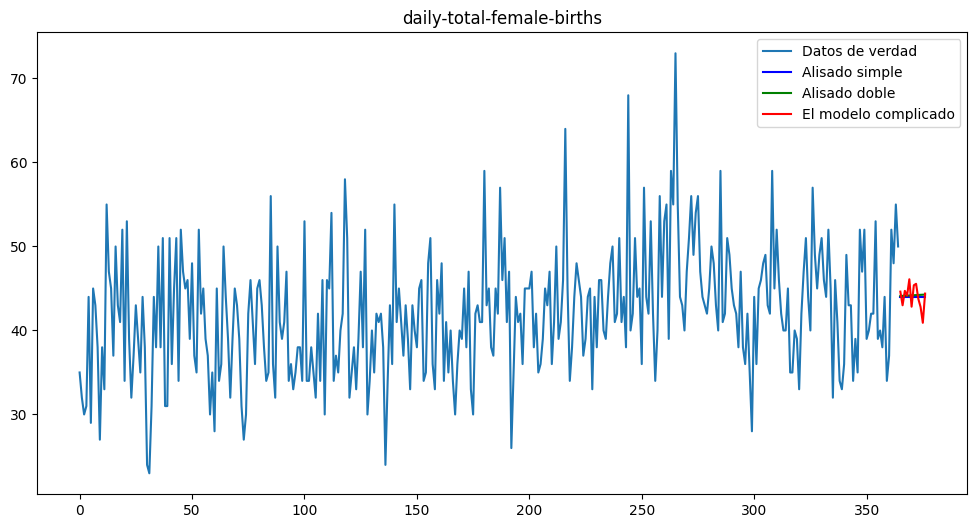

C:\Users\juanc\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\juanc\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


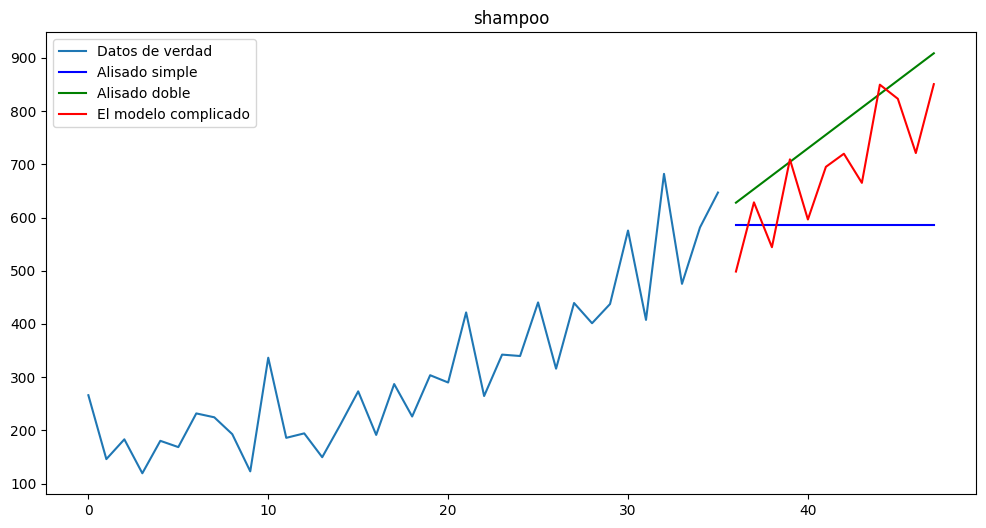

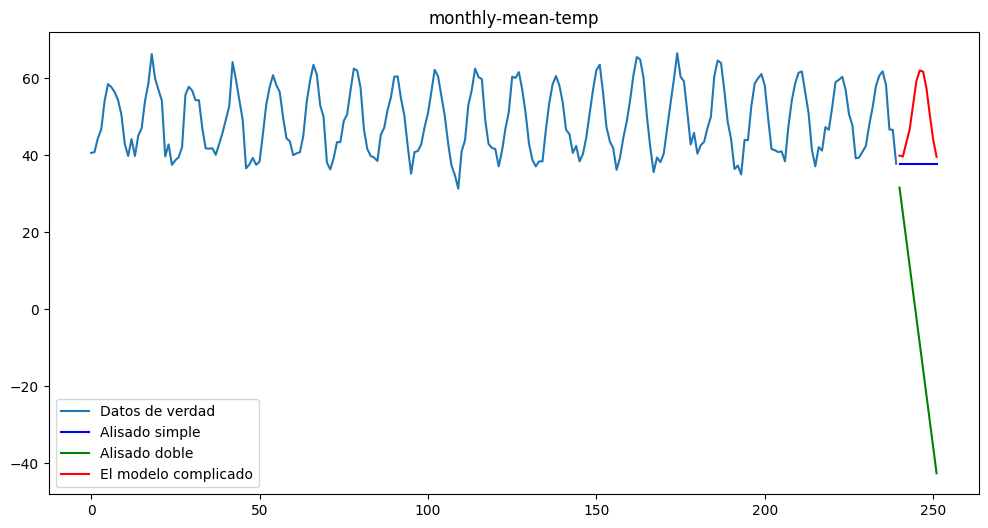

C:\Users\juanc\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\juanc\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


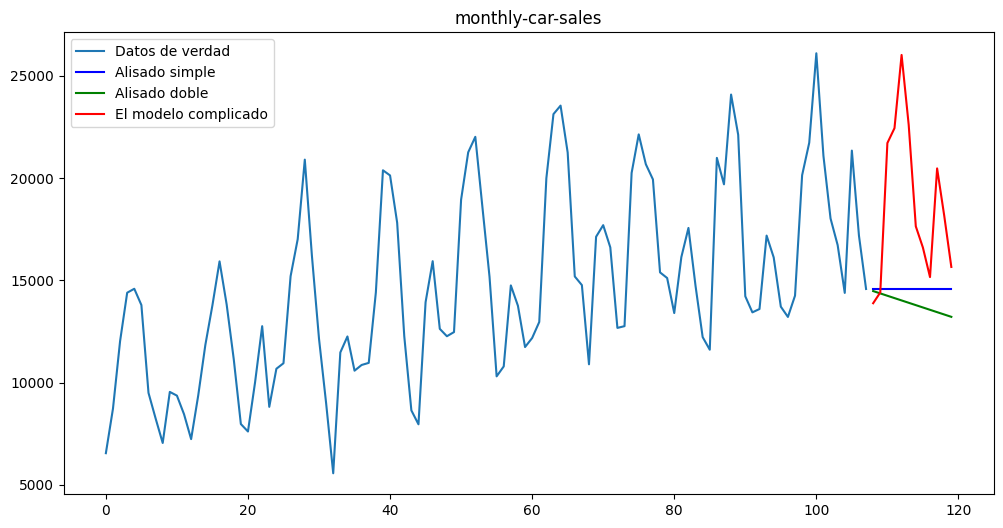

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX

def predice_cosas(archivo, pasos=12):
    # Abrir archivo
    datos = pd.read_csv(archivo + ".csv")
    
    # Tomar solo la columna con los números
    serie = datos[datos.columns[1]].values
    
    # Alisado simple
    modelo_simple = SimpleExpSmoothing(serie).fit()
    pred_simple = modelo_simple.forecast(steps=pasos)
    
    # Alisado doble
    modelo_doble = ExponentialSmoothing(serie, trend='add').fit()
    pred_doble = modelo_doble.forecast(steps=pasos)
    
    # SARIMA (modelo complicado)
    modelo_sarima = SARIMAX(serie, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    sarima_listo = modelo_sarima.fit(disp=False)
    pred_sarima = sarima_listo.predict(len(serie), len(serie) + pasos - 1)
    
    # Hacer dibujito
    plt.figure(figsize=(12, 6))
    plt.plot(serie, label='Datos de verdad')
    plt.plot(range(len(serie), len(serie) + pasos), pred_simple, label='Alisado simple', color='blue')
    plt.plot(range(len(serie), len(serie) + pasos), pred_doble, label='Alisado doble', color='green')
    plt.plot(range(len(serie), len(serie) + pasos), pred_sarima, label='El modelo complicado', color='red')
    plt.title(archivo)
    plt.legend()
    plt.show()

# Archivos para mirar
mis_archivos = [
    "daily-total-female-births",
    "shampoo",
    "monthly-mean-temp",
    "monthly-car-sales"
]

# Hacer todo por cada archivo
for archivo in mis_archivos:
    predice_cosas(archivo)


12:31:26 - cmdstanpy - INFO - Chain [1] start processing
12:31:26 - cmdstanpy - INFO - Chain [1] done processing


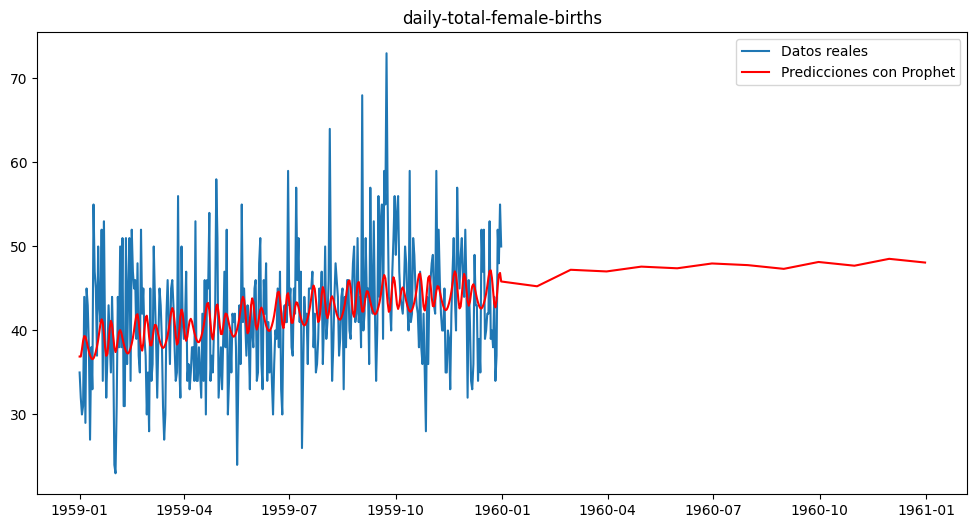

12:31:26 - cmdstanpy - INFO - Chain [1] start processing
12:31:26 - cmdstanpy - INFO - Chain [1] done processing


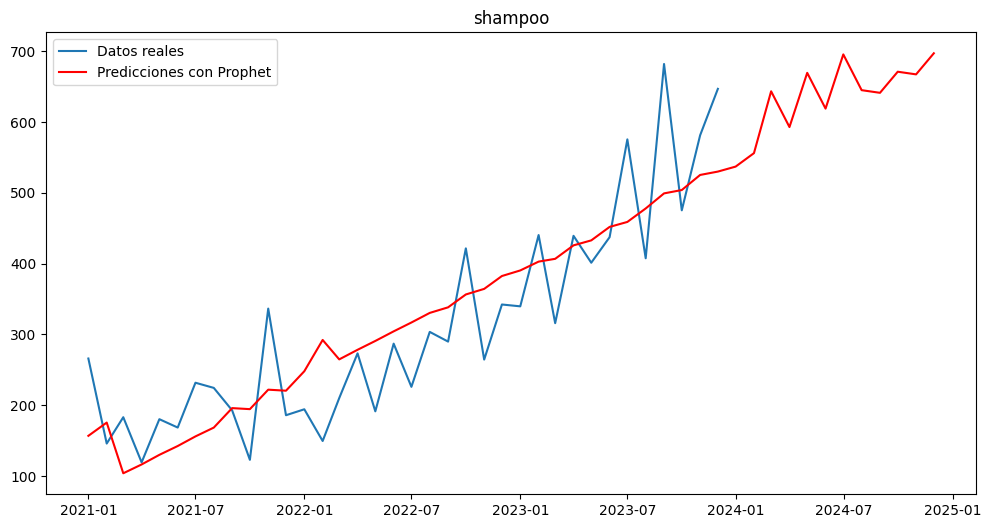

12:31:27 - cmdstanpy - INFO - Chain [1] start processing
12:31:27 - cmdstanpy - INFO - Chain [1] done processing


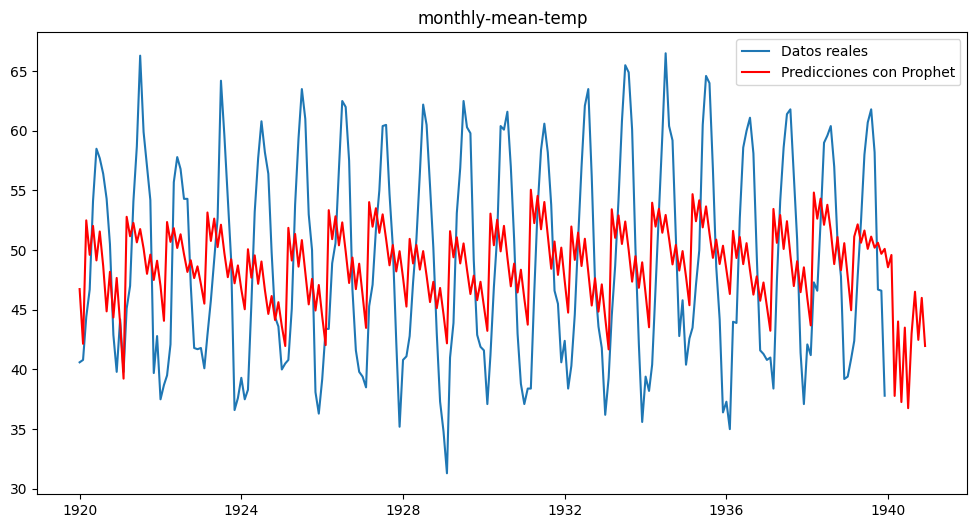

12:31:27 - cmdstanpy - INFO - Chain [1] start processing
12:31:27 - cmdstanpy - INFO - Chain [1] done processing


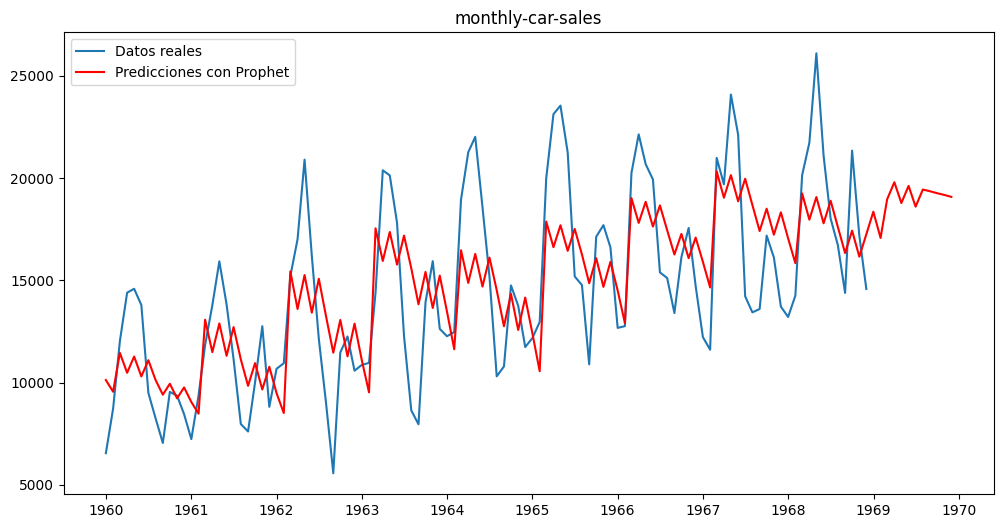

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

def convertir_fecha_custom(fecha):
    year, month = fecha.split('-')
    year_base = 2021
    year_final = year_base + int(year) - 1
    return pd.to_datetime(f"{year_final}-{month}")

def convertir_fecha(fecha, archivo):
    if archivo == "shampoo":
        return convertir_fecha_custom(fecha)
    else:
        formatos = {
            "daily-total-female-births": "%Y-%m-%d",
            "monthly-mean-temp": "%Y-%m",
            "monthly-car-sales": "%Y-%m"
        }
        return pd.to_datetime(fecha, format=formatos[archivo], errors='coerce')

def predice_con_prophet(archivo, pasos=12):
    # Abrir archivo, suponiendo que la primera fila es el encabezado
    datos = pd.read_csv(archivo + ".csv", header=0)
    
    # Convertir la fecha a formato datetime basado en el archivo
    datos['ds'] = datos[datos.columns[0]].apply(lambda x: convertir_fecha(x, archivo))
    
    # Verificar y eliminar filas con fechas NaN
    filas_con_nan = datos[datos['ds'].isna()]
    if not filas_con_nan.empty:
        print(f"Eliminando filas con fechas no válidas en {archivo}:")
        print(filas_con_nan)
        datos.dropna(subset=['ds'], inplace=True)
    
    # Preparar datos para Prophet
    datos_para_prophet = pd.DataFrame({
        'ds': datos['ds'], 
        'y': datos[datos.columns[1]] # asumimos que la segunda columna contiene los valores
    })
    
    # Crear y entrenar el modelo Prophet
    modelo = Prophet(yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False)
    modelo.add_seasonality(name='monthly', period=30.5, fourier_order=5)
    modelo.fit(datos_para_prophet)
    
    # Hacer una predicción con Prophet
    futuro = modelo.make_future_dataframe(periods=pasos, freq='M')
    predicciones = modelo.predict(futuro)
    
    # Dibujar todo
    plt.figure(figsize=(12, 6))
    plt.plot(datos_para_prophet['ds'], datos_para_prophet['y'], label='Datos reales')
    plt.plot(predicciones['ds'], predicciones['yhat'], label='Predicciones con Prophet', color='red')
    plt.title(archivo)
    plt.legend()
    plt.show()

# Lista de archivos para mirar
mis_archivos = [
    "daily-total-female-births",
    "shampoo",
    "monthly-mean-temp",
    "monthly-car-sales"
]

# Hacer todo por cada archivo
for archivo in mis_archivos:
    predice_con_prophet(archivo)
